In [1]:
import pandas as pd
df=pd.read_csv('c:/project/movie/movies.csv')
df
# NaN: Not a Number 결측값

,rating,genre,year,score,votes,continent,runtime,gross
0,PG,Action,1980,5.0,4100,Europe,115,0
1,PG,Drama,1980,7.9,13000,Oceania,107,0
2,R,Horror,1980,4.6,3900,North America,82,0
3,PG,Biography,1980,8.3,15000,Africa,173,0
4,PG,Biography,1980,4.2,3700,North America,124,0
...,...,...,...,...,...,...,...,...
7646,Not Rated,Horror,2020,3.4,447,North America,87,0
7647,Not Rated,Fantasy,2020,5.7,165,North America,85,0
7648,Not Rated,Comedy,2020,7.1,14,North America,90,0
7649,Not Rated,Comedy,2020,4.7,36,North America,90,0


<AxesSubplot:>

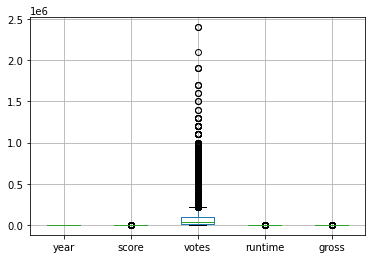

In [2]:
df.boxplot()

In [3]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd 
df1=pd.DataFrame(['Drama', 'Animation','etc','Action','Comedy','Horror', 'Fantasy', 'Biography'],columns=['genre'])
df2=pd.DataFrame(['R','G','Ndf1ot Rated','PG','PG-13','NC-17'],columns=['rating'])
df3=pd.DataFrame(['Europe', 'Oceania', 'North America', 'Asia', 'South America', 'Africa'], columns=['continent'])

In [4]:
# onehotencoding 실행
df1=pd.get_dummies(df1['genre'],prefix='genre') 
df1

,genre_Action,genre_Animation,genre_Biography,genre_Comedy,genre_Drama,genre_Fantasy,genre_Horror,genre_etc
0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,0,0


In [5]:
df2=pd.get_dummies(df2['rating'],prefix='rating')
df2

,rating_G,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,1,0,0,0,0


In [6]:
df3=pd.get_dummies(df3['continent'],prefix='continent')
df3

,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,1,0,0,0,0
4,0,0,0,0,0,1
5,1,0,0,0,0,0


In [8]:
train_cols = df.columns[:-1]
X=df[train_cols]
y=df['gross']

In [9]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['gross'])
df_samp=pd.concat([X_samp,y_samp],axis=1)


In [10]:
X = X_samp[train_cols] # 독립변수
y = y_samp["gross"]


In [11]:
from sklearn.preprocessing import RobustScaler
import numpy as np
scaler = RobustScaler()
genre=scaler.fit_transform(df1)
rating=scaler.fit_transform(df2)
continent=scaler.fit_transform(df3)



In [12]:
df['score'].unique()

array([5. , 7.9, 4.6, 8.3, 4.2, 6.7, 5.3, 5.5, 8.1, 6.9, 8.4, 5.8, 8.7,
       7.7, 7.3, 6.4, 8.2, 6.8, 7. , 6.1, 7.1, 7.2, 6.6, 6.5, 6.2, 5.4,
       6.3, 6. , 5.9, 7.5, 4.8, 5.1, 4.7, 5.2, 7.4, 4. , 4.3, 7.6, 4.9,
       3.4, 7.8, 5.6, 2.7, 2.9, 3.6, 5.7, 3.8, 4.4, 8. , 3.7, 3.9, 3.5,
       4.1, 3. , 4.5, 8.5, 3.2, 2.6, 2.2, 3.1, 8.6, 8.9, 9.3, 8.8, 3.3,
       2.5, 2.3, 2.1, 1.9, 2.4, 2.8, 9. ])

In [13]:
rating

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [14]:
from sklearn.model_selection import train_test_split
#데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=7)



In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3691    1
3692    1
3693    1
3694    1
3695    1
Name: gross, Length: 3696, dtype: int64

In [16]:
# arr = np.array([1, 2, 3])
# X=arr.reshape(-1, 1)

<AxesSubplot:>

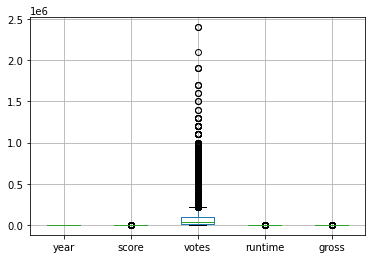

In [17]:
df.boxplot()

In [18]:
# from patsy import demo_data
# import pandas as pd
# import numpy as np
# # 임의의 실수형 데이터

# df=pd.read_csv('c:/project/movie/movies.csv')
# df
# df.boxplot()

# X = np.arange(7).reshape(7, 1) #7 1 행 열로 변환
# X

# X2 = np.vstack([X, [[1000]]]) #배열을 세로로 쌓는 함수
# X2
# scaler.fit_transform(X2)
# from sklearn.preprocessing import RobustScaler
# # 평균 0, 표준편차 1이 되도록 스케일링
# scaler = RobustScaler()
# scaler.fit_transform(X2)